In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import numpy as np
from dark_emulator_public import dark_emulator
import os, sys, time, json, copy
import matplotlib.pyplot as plt
from collections import OrderedDict as od
from scipy.interpolate import InterpolatedUnivariateSpline as ius
from scipy.interpolate import interp2d, interp1d
from scipy.integrate import simps
from tqdm import tqdm
import hsc3x2pt
import joblib

using dark_emulator at  /lustre/work/sunao.sugiyama/package/dark_emulator_public/dark_emulator/__init__.py


In [2]:
power_b1 = hsc3x2pt.power_b1_class()

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


In [3]:
fishers_dict = od()

## Instantiate Fisher classes
### Year 1 single source bin

In [4]:
fisher1x2pt = joblib.load('FisherMats/single_source_ClY1/fisher1x2pt.cmp')
fisher2x2pt = joblib.load('FisherMats/single_source_ClY1/fisher2x2pt.cmp')
fisher3x2pt = joblib.load('FisherMats/single_source_ClY1/fisher3x2pt.cmp')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.01],
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph','dm'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph','dm'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph','dm'], label='Prior')

fishers_dict['Y1single2x2pt'] = fisher2x2pt
fishers_dict['Y1single1x2pt'] = fisher1x2pt
fishers_dict['Y1single3x2pt'] = fisher3x2pt
fishers_dict['Y1single2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y1single1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y1single3x2ptPrior'] = fisher3x2ptPrior

### Year 1 double source bins

In [5]:
fisher1x2pt = joblib.load('FisherMats/double_source_ClY1/fisher1x2pt.cmp')
fisher2x2pt = joblib.load('FisherMats/double_source_ClY1/fisher2x2pt.cmp')
fisher3x2pt = joblib.load('FisherMats/double_source_ClY1/fisher3x2pt.cmp')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.01, 0.01],
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dm1','dm2'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.1, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph1','dzph2','dm1','dm2'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dm1','dm2'], label='Prior')

fishers_dict['Y1double2x2pt'] = fisher2x2pt
fishers_dict['Y1double1x2pt'] = fisher1x2pt
fishers_dict['Y1double3x2pt'] = fisher3x2pt
fishers_dict['Y1double2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y1double1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y1double3x2ptPrior'] = fisher3x2ptPrior

### Year 1 quadruple source bins

In [6]:
fisher1x2pt = joblib.load('FisherMats/quadruple_source_ClY1/fisher1x2pt.cmp')
fisher2x2pt = joblib.load('FisherMats/quadruple_source_ClY1/fisher2x2pt.cmp')
fisher3x2pt = joblib.load('FisherMats/quadruple_source_ClY1/fisher3x2pt.cmp')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01],
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4'], label='Prior')

fishers_dict['Y1quadruple2x2pt'] = fisher2x2pt
fishers_dict['Y1quadruple1x2pt'] = fisher1x2pt
fishers_dict['Y1quadruple3x2pt'] = fisher3x2pt
fishers_dict['Y1quadruple2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y1quadruple1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y1quadruple3x2ptPrior'] = fisher3x2ptPrior

### Year **3** single source bin

In [7]:
fisher1x2pt = joblib.load('FisherMats/single_source_ClY3/fisher1x2pt.cmp')
fisher2x2pt = joblib.load('FisherMats/single_source_ClY3/fisher2x2pt.cmp')
fisher3x2pt = joblib.load('FisherMats/single_source_ClY3/fisher3x2pt.cmp')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.01],
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph','dm'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph','dm'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph','dm'], label='Prior')

fishers_dict['Y3single2x2pt'] = fisher2x2pt
fishers_dict['Y3single1x2pt'] = fisher1x2pt
fishers_dict['Y3single3x2pt'] = fisher3x2pt
fishers_dict['Y3single2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y3single1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y3single3x2ptPrior'] = fisher3x2ptPrior

### year 3 double source bins

In [9]:
fisher1x2pt = joblib.load('FisherMats/double_source_ClY3/fisher1x2pt.cmp')
fisher2x2pt = joblib.load('FisherMats/double_source_ClY3/fisher2x2pt.cmp')
fisher3x2pt = joblib.load('FisherMats/double_source_ClY3/fisher3x2pt.cmp')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.01, 0.01],
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dm1','dm2'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.1, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph1','dzph2','dm1','dm2'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dm1','dm2'], label='Prior')

fishers_dict['Y3double2x2pt'] = fisher2x2pt
fishers_dict['Y3double1x2pt'] = fisher1x2pt
fishers_dict['Y3double3x2pt'] = fisher3x2pt
fishers_dict['Y3double2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y3double1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y3double3x2ptPrior'] = fisher3x2ptPrior

cov.shape = (90, 90), dim(data)=(90,)
cov.shape = (51, 51), dim(data)=(51,)
skip b1lowz because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass2 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamaglowz because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass2 because this is lens galaxy param, while probes does not include any lens related probe.
cov.shape = (141, 141), dim(data)=(141,)


### Year 3 quadruple source bins

In [8]:
fisher1x2pt = joblib.load('FisherMats/quadruple_source_ClY3/fisher1x2pt.cmp')
fisher2x2pt = joblib.load('FisherMats/quadruple_source_ClY3/fisher2x2pt.cmp')
fisher3x2pt = joblib.load('FisherMats/quadruple_source_ClY3/fisher3x2pt.cmp')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01],
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4'], label='Prior')

fishers_dict['Y3quadruple2x2pt'] = fisher2x2pt
fishers_dict['Y3quadruple1x2pt'] = fisher1x2pt
fishers_dict['Y3quadruple3x2pt'] = fisher3x2pt
fishers_dict['Y3quadruple2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y3quadruple1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y3quadruple3x2ptPrior'] = fisher3x2ptPrior

## Plot

In [9]:
corner = hsc3x2pt.corner_class()

### 3x2pt: single vs double vs quadruple

,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$
"3x2pt (Y3, 1bin) + Prior",0.04984,0.04298,0.03518
"3x2pt (Y3, 2bin) + Prior",0.04962,0.04148,0.02724
"3x2pt (Y3, 4bin) + Prior",0.04689,0.03876,0.02391


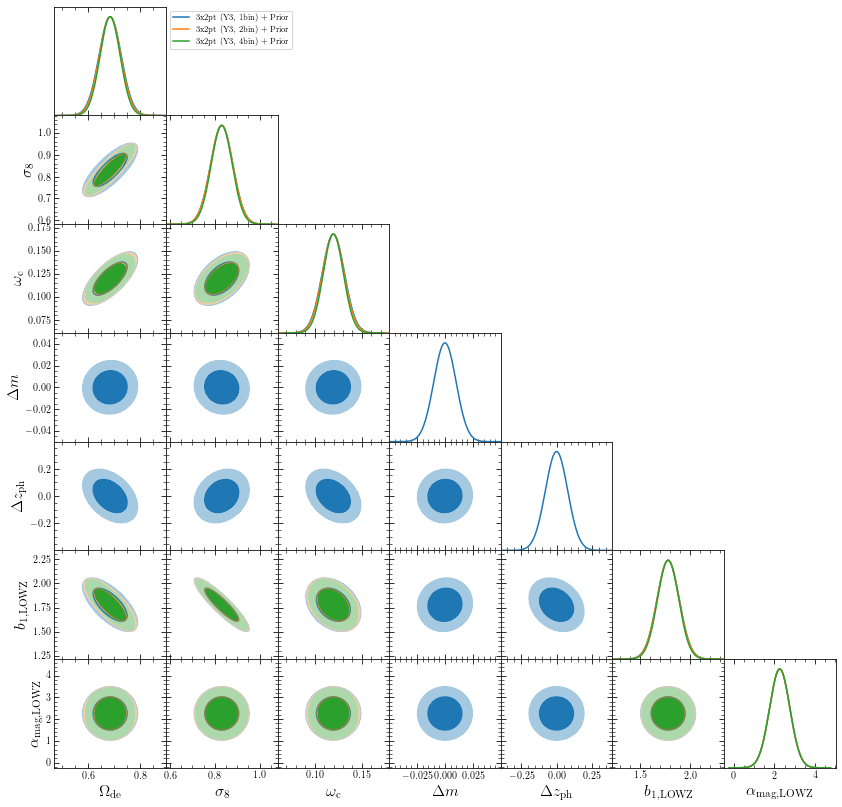

In [12]:
fishers = [fishers_dict[key] for key in ['Y3single3x2ptPrior', 'Y3double3x2ptPrior', 'Y3quadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'omega_c', 'dm', 'dzph', 'b1lowz', 'alphamaglowz'], 
                         figsize_ratio=2, usetex=True)
fig.export('figures/corner_fY3single3x2ptPrior_fY3double3x2ptPrior_fY3quadruple3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

In [13]:
fishers = [fishers_dict[key] for key in ['Y3single3x2ptPrior', 'Y3double3x2ptPrior', 'Y3quadruple3x2ptPrior']]
df = hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

print(df.to_latex(escape=False))

with open('figures/Y3_single_double_quadruple_table.tex', 'w') as f:
    f.write(df.to_latex(escape=False))
    
df

\begin{tabular}{llll}
\toprule
{} & $\sigma_8$ & $\Omega_\mathrm{de}$ & $S_8(0.5)$ \\
\midrule
3x2pt (Y3, 1bin) + Prior &    0.04984 &              0.04298 &    0.03518 \\
3x2pt (Y3, 2bin) + Prior &    0.04962 &              0.04148 &    0.02724 \\
3x2pt (Y3, 4bin) + Prior &    0.04689 &              0.03876 &    0.02391 \\
\bottomrule
\end{tabular}



,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$
"3x2pt (Y3, 1bin) + Prior",0.04984,0.04298,0.03518
"3x2pt (Y3, 2bin) + Prior",0.04962,0.04148,0.02724
"3x2pt (Y3, 4bin) + Prior",0.04689,0.03876,0.02391


,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$
"3x2pt (Y3, 1bin) + Prior",0.04984,0.04298,0.03518
"3x2pt (Y3, 2bin) + Prior",0.04962,0.04148,0.02724
"3x2pt (Y3, 4bin) + Prior",0.04689,0.03876,0.02391


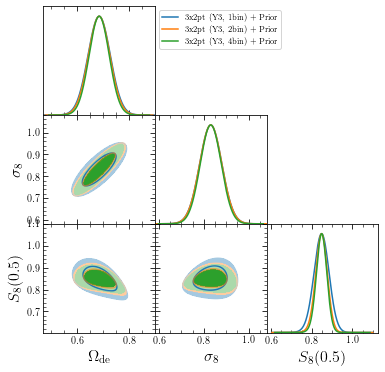

In [14]:
fishers = [fishers_dict[key] for key in ['Y3single3x2ptPrior', 'Y3double3x2ptPrior', 'Y3quadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'],
                         figsize_ratio=2, usetex=True)
fig.export('figures/corner_fY3single3x2ptPrior_fY3double3x2ptPrior_fY3quadruple3x2ptPrior_sigma8Ode.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

## same but with optimized $\alpha$ of $S_8$

In [15]:
fishers = [fishers_dict[key] for key in ['Y3single3x2ptPrior', 'Y3double3x2ptPrior', 'Y3quadruple3x2ptPrior']]
df = hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8', 'S8opt'])

print(df.to_latex(escape=False))

with open('figures/Y3_single_double_quadruple_table_S8alphaopt.tex', 'w') as f:
    f.write(df.to_latex(escape=False))
df

Optimizing alpha of S8 to 0.3440764848240576
Optimizing alpha of S8 to 0.39375974371267747
Optimizing alpha of S8 to 0.4043326878215946
\begin{tabular}{lllll}
\toprule
{} & $\sigma_8$ & $\Omega_\mathrm{de}$ & $S_8(0.5)$ & $S_8(\alpha)$ \\
\midrule
3x2pt (Y3, 1bin) + Prior &    0.04984 &              0.04298 &    0.03518 &       0.03030 \\
3x2pt (Y3, 2bin) + Prior &    0.04962 &              0.04148 &    0.02724 &       0.02433 \\
3x2pt (Y3, 4bin) + Prior &    0.04689 &              0.03876 &    0.02391 &       0.02207 \\
\bottomrule
\end{tabular}



,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$,$S_8(\alpha)$
"3x2pt (Y3, 1bin) + Prior",0.04984,0.04298,0.03518,0.03030
"3x2pt (Y3, 2bin) + Prior",0.04962,0.04148,0.02724,0.02433
"3x2pt (Y3, 4bin) + Prior",0.04689,0.03876,0.02391,0.02207


Optimizing alpha of S8 to 0.3440764848240576
Optimizing alpha of S8 to 0.39375974371267747
Optimizing alpha of S8 to 0.4043326878215946
Optimizing alpha of S8 to 0.3440764848240576
Optimizing alpha of S8 to 0.39375974371267747
Optimizing alpha of S8 to 0.4043326878215946
Optimizing alpha of S8 to 0.3440764848240576
Optimizing alpha of S8 to 0.39375974371267747
Optimizing alpha of S8 to 0.4043326878215946
Optimizing alpha of S8 to 0.3440764848240576
Optimizing alpha of S8 to 0.39375974371267747
Optimizing alpha of S8 to 0.4043326878215946


,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$,$S_8(\alpha)$
"3x2pt (Y3, 1bin) + Prior",0.04984,0.04298,0.03518,0.03030
"3x2pt (Y3, 2bin) + Prior",0.04962,0.04148,0.02724,0.02433
"3x2pt (Y3, 4bin) + Prior",0.04689,0.03876,0.02391,0.02207


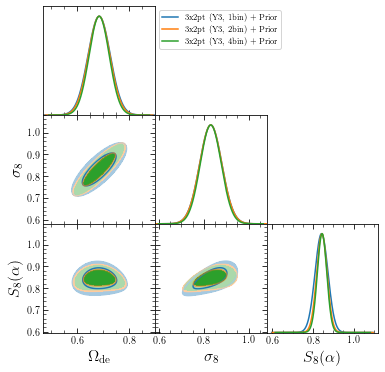

In [16]:
fishers = [fishers_dict[key] for key in ['Y3single3x2ptPrior', 'Y3double3x2ptPrior', 'Y3quadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8opt'],
                         figsize_ratio=2, usetex=True)
fig.export('figures/corner_fY3single3x2ptPrior_fY3double3x2ptPrior_fY3quadruple3x2ptPrior_sigma8Ode_S8alphaopt.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8', 'S8opt'])

Optimizing alpha of S8 to 0.3440764848240576
Optimizing alpha of S8 to 0.39375974371267747
Optimizing alpha of S8 to 0.4043326878215946
Optimizing alpha of S8 to 0.3440764848240576
Optimizing alpha of S8 to 0.39375974371267747
Optimizing alpha of S8 to 0.4043326878215946
Optimizing alpha of S8 to 0.3440764848240576
Optimizing alpha of S8 to 0.39375974371267747
Optimizing alpha of S8 to 0.4043326878215946
Optimizing alpha of S8 to 0.3440764848240576
Optimizing alpha of S8 to 0.39375974371267747
Optimizing alpha of S8 to 0.4043326878215946


,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$,$S_8(\alpha)$
"3x2pt (Y3, 1bin) + Prior",0.04984,0.04298,0.03518,0.03030
"3x2pt (Y3, 2bin) + Prior",0.04962,0.04148,0.02724,0.02433
"3x2pt (Y3, 4bin) + Prior",0.04689,0.03876,0.02391,0.02207


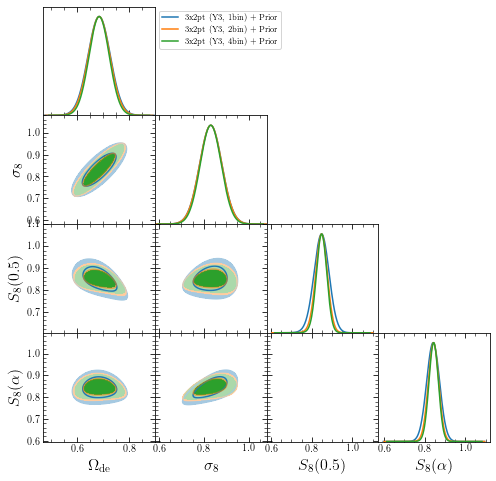

In [17]:
fishers = [fishers_dict[key] for key in ['Y3single3x2ptPrior', 'Y3double3x2ptPrior', 'Y3quadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8','S8opt'],
                         figsize_ratio=2, usetex=True)
fig.export('figures/corner_fY3single3x2ptPrior_fY3double3x2ptPrior_fY3quadruple3x2ptPrior_sigma8Ode_S8_S8alphaopt.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8', 'S8opt'])

### single: degeneracy breaking comparing 1x2pt, 2x2pt, 3x2pt

b1lowz is not included any fisher analysis. Omitting it.
alphamaglowz is not included any fisher analysis. Omitting it.


,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$
"Cosmic Shear (Y3, 1bin) + Prior",0.14248,0.12431,0.05588
"2x2pt (Y3, 1bin) + Prior",0.11450,0.05875,0.07633
"3x2pt (Y3, 1bin) + Prior",0.04984,0.04298,0.03518


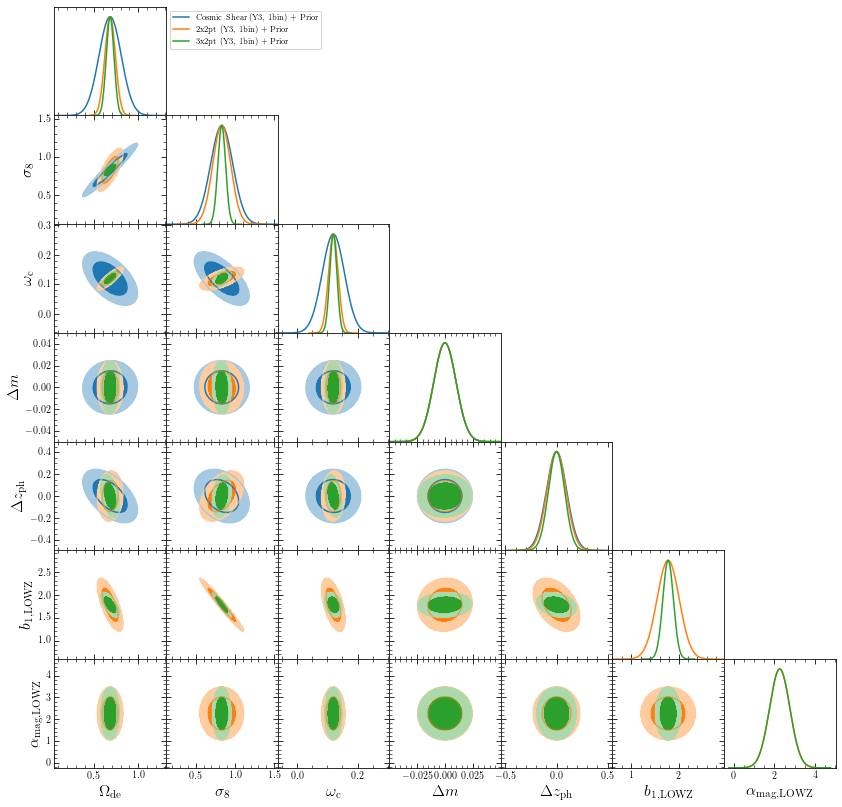

In [18]:
fishers = [fishers_dict[key] for key in ['Y3single1x2ptPrior', 'Y3single2x2ptPrior', 'Y3single3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'omega_c', 'dm', 'dzph', 'b1lowz', 'alphamaglowz'], 
                         figsize_ratio=2, usetex=True)
fig.export('figures/corner_fY3single1x2ptPrior_fY3single2x2ptPrior_fY3single3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$
"Cosmic Shear (Y1, 1bin) + Prior",0.25078,0.20228,0.08851
"2x2pt (Y1, 1bin) + Prior",0.14950,0.05973,0.11432
"3x2pt (Y1, 1bin) + Prior",0.06778,0.05085,0.04120


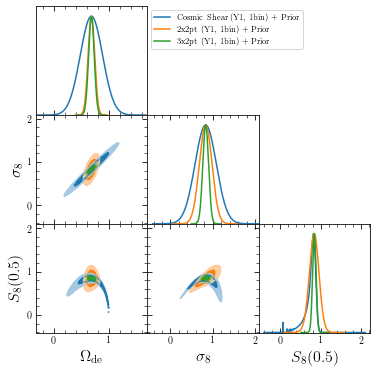

In [19]:
fishers = [fishers_dict[key] for key in ['Y1single1x2ptPrior', 'Y1single2x2ptPrior', 'Y1single3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'],#, 'omega_c', 'dm', 'dzph', 'b1lowz', 'alphamaglowz'], 
                         figsize_ratio=2, usetex=True)
fig.export('figures/corner_fY1single1x2ptPrior_fY1single2x2ptPrior_fY1single3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

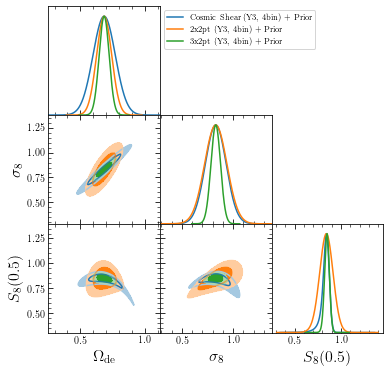

In [20]:
fishers = [fishers_dict[key] for key in ['Y3quadruple1x2ptPrior', 'Y3quadruple2x2ptPrior', 'Y3quadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'],#, 'omega_c', 'dm', 'dzph', 'b1lowz', 'alphamaglowz'], 
                         figsize_ratio=2, usetex=True)

In [21]:
corner = hsc3x2pt.corner_class()

,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$
"Cosmic Shear (Y1, 4bin) + Prior",0.17450,0.13948,0.05132
"2x2pt (Y1, 4bin) + Prior",0.14612,0.05970,0.11174
"3x2pt (Y1, 4bin) + Prior",0.06324,0.04865,0.02852


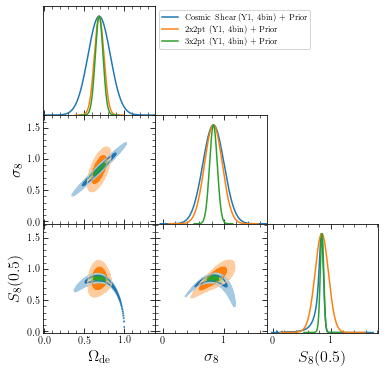

In [22]:
fishers = [fishers_dict[key] for key in ['Y1quadruple1x2ptPrior', 'Y1quadruple2x2ptPrior', 'Y1quadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'],#, 'omega_c', 'dm', 'dzph', 'b1lowz', 'alphamaglowz'], 
                         figsize_ratio=2, usetex=True)

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

using dark_emulator at  /lustre/work/sunao.sugiyama/package/dark_emulator_public/dark_emulator/__init__.py


,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$
"Cosmic Shear (Y3, 4bin) + Prior",0.10146,0.08653,0.03183
"2x2pt (Y3, 4bin) + Prior",0.10905,0.05868,0.06842
"3x2pt (Y3, 4bin) + Prior",0.04689,0.03876,0.02391


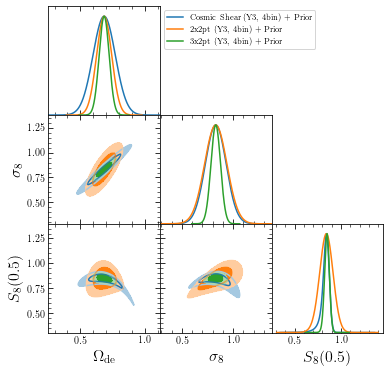

In [28]:
fishers = [fishers_dict[key] for key in ['Y3quadruple1x2ptPrior', 'Y3quadruple2x2ptPrior', 'Y3quadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'],#, 'omega_c', 'dm', 'dzph', 'b1lowz', 'alphamaglowz'], 
                         figsize_ratio=2, usetex=True)

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

### w/ and w/o Priors

,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$
"3x2pt (Y3, 1bin)",0.16687,0.06787,0.19305
"3x2pt (Y3, 1bin) + Prior",0.04984,0.04298,0.03518


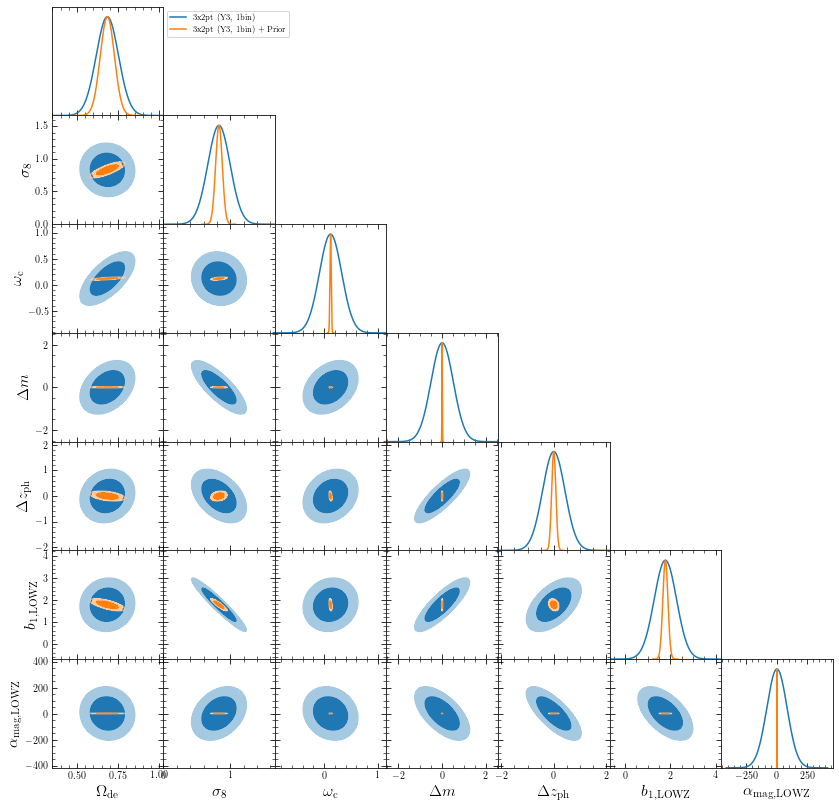

In [23]:
fishers = [fishers_dict[key] for key in ['Y3single3x2pt', 'Y3single3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'omega_c', 'dm', 'dzph', 'b1lowz', 'alphamaglowz'], 
                         figsize_ratio=2, usetex=True)
fig.export('figures/corner_fY3single3x2pt_fY3single3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$
"3x2pt (Y3, 1bin) + Prior",0.04984,0.04298,0.03518
"3x2pt (Y3, 1bin) + TwiceWiderPrior",0.05128,0.04607,0.04927


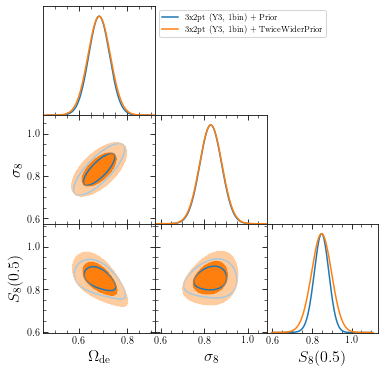

In [24]:
fishers_dict['Y3single3x2ptTwiceWiderPrior'] = fishers_dict['Y3single3x2pt'].addPrior([0.00038, 0.0042, 1, 1, 1, 0.2, 0.02], 
                                                                                        ['omega_b', 'ns', 
                                                                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                                                                         'dzph', 'dm'], label='TwiceWiderPrior')
fishers = [fishers_dict[key] for key in ['Y3single3x2ptPrior', 'Y3single3x2ptTwiceWiderPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'], #, 'omega_c', 'dm', 'dzph', 'b1lowz', 'alphamaglowz'], 
                         figsize_ratio=2, usetex=True)
fig.export('figures/corner_fY3single3x2ptPrior_fY3single3x2ptTwiceWiderPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

### Comparison between Y1 and Y3

,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$
"3x2pt (Y1, 1bin) + Prior",0.06778,0.05085,0.04120
"3x2pt (Y3, 1bin) + Prior",0.04984,0.04298,0.03518


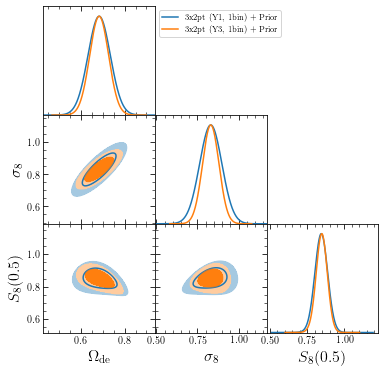

In [25]:
fishers = [fishers_dict[key] for key in ['Y1single3x2ptPrior', 'Y3single3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'],#, 'omega_c', 'dm', 'dzph', 'b1lowz', 'alphamaglowz'], 
                         figsize_ratio=2, usetex=True)
fig.export('figures/corner_fY1single3x2ptPrior_fY3single3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$
"2x2pt (Y1, 1bin) + Prior",0.14950,0.05973,0.11432
"2x2pt (Y3, 1bin) + Prior",0.11450,0.05875,0.07633


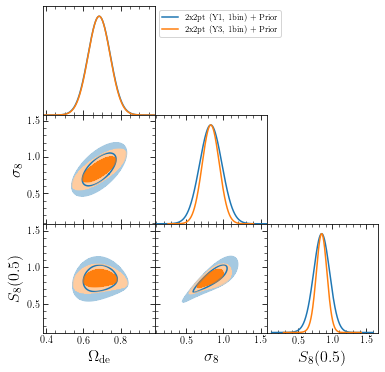

In [26]:
fishers = [fishers_dict[key] for key in ['Y1single2x2ptPrior', 'Y3single2x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'], #, 'omega_c', 'dm', 'dzph', 'b1lowz', 'alphamaglowz'], 
                         figsize_ratio=2, usetex=True)
#fig.export('figures/corner_fY1single2x2ptPrior_fY3single2x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$
"3x2pt (Y1, 4bin) + Prior",0.06324,0.04865,0.02852
"3x2pt (Y3, 4bin) + Prior",0.04689,0.03876,0.02391


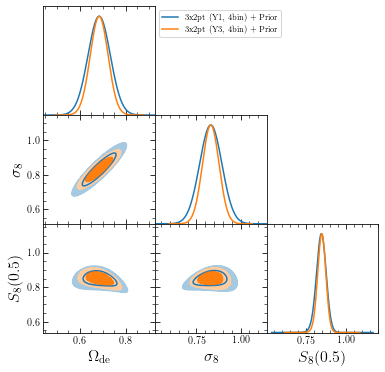

In [27]:
fishers = [fishers_dict[key] for key in ['Y1quadruple3x2ptPrior', 'Y3quadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'], #, 'omega_c', 'dm', 'dzph', 'b1lowz', 'alphamaglowz'], 
                         figsize_ratio=2, usetex=True)
#fig.export('figures/corner_fY1quadruple3x2ptPrior_fY3quadruple3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])